In [10]:
! pip install transformers
! pip install matplotlib

from transformers import pipeline
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


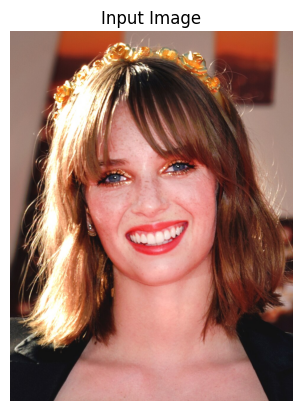

In [11]:
# image to classify
img = Image.open("UNKNOWN.jpg").convert("RGB")

# transform the image to 224x224 (ViT input size) and normalize
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
input_tensor = transform(img).unsqueeze(0)  # add batch dimension

# show the image
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")
plt.show()


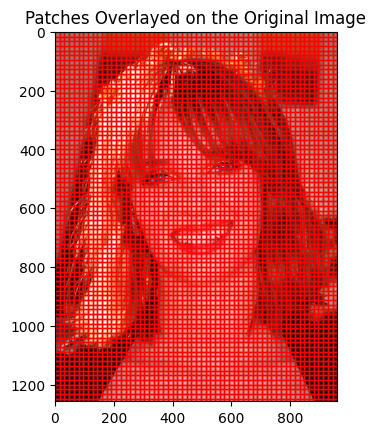

In [12]:
def show_patches(img, patch_size=16):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title("Patches Overlayed on the Original Image")
    w, h = img.size
    for i in range(0, w, patch_size):
        for j in range(0, h, patch_size):
            rect = plt.Rectangle((i, j), patch_size, patch_size, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    plt.show()

show_patches(img)

In [13]:
pipe = pipeline("image-classification", model="tonyassi/celebrity-classifier")

# Perform classification
result = pipe('UNKNOWN.jpg')

# Print results
print('Classification:', result[0]['label'])
print('Accuracy: ', result[0]['score'])
print('Other Guesses: ', result[1:])

Device set to use cpu


Classification: Maya Hawke
Accuracy:  0.9880587458610535
Other Guesses:  [{'label': 'Mackenzie Davis', 'score': 0.0009837101679295301}, {'label': 'Alison Brie', 'score': 0.0008794456371106207}, {'label': 'Zooey Deschanel', 'score': 0.0007109372527338564}, {'label': 'Taylor Swift', 'score': 0.00038442786899395287}]
